<a href="https://colab.research.google.com/github/hyunjung930/sesac-web/blob/main/%ED%86%B5%EA%B3%84%EB%8D%B0%EC%9D%B4%ED%84%B0%EB%B6%84%EC%84%9D_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#KNN Regression(K-최근접 이웃 회귀)
:  알고리즘은 주변의 가장 가까운 K개의 샘플을 통해 값을 예측하는 방식

In [80]:
 from sklearn.datasets import load_iris

In [81]:
# 우리가 사용할 데이터가 무엇인지 꼭 확인하자!
iris_data = load_iris()
iris_data
# 4가지의 데이터  

{'DESCR': '.. _iris_dataset:\n\nIris plants dataset\n--------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 150 (50 in each of three classes)\n    :Number of Attributes: 4 numeric, predictive attributes and the class\n    :Attribute Information:\n        - sepal length in cm\n        - sepal width in cm\n        - petal length in cm\n        - petal width in cm\n        - class:\n                - Iris-Setosa\n                - Iris-Versicolour\n                - Iris-Virginica\n                \n    :Summary Statistics:\n\n    ============== ==== ==== ======= ===== ====================\n                    Min  Max   Mean    SD   Class Correlation\n    ============== ==== ==== ======= ===== ====================\n    sepal length:   4.3  7.9   5.84   0.83    0.7826\n    sepal width:    2.0  4.4   3.05   0.43   -0.4194\n    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)\n    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)\n    ===========

In [4]:
data = iris_data['data']
target  = iris_data['target']
tnames = iris_data['target_names']
for i,y in enumerate(target):
  print(f'{i}:{tnames[y]}')

0:setosa
1:setosa
2:setosa
3:setosa
4:setosa
5:setosa
6:setosa
7:setosa
8:setosa
9:setosa
10:setosa
11:setosa
12:setosa
13:setosa
14:setosa
15:setosa
16:setosa
17:setosa
18:setosa
19:setosa
20:setosa
21:setosa
22:setosa
23:setosa
24:setosa
25:setosa
26:setosa
27:setosa
28:setosa
29:setosa
30:setosa
31:setosa
32:setosa
33:setosa
34:setosa
35:setosa
36:setosa
37:setosa
38:setosa
39:setosa
40:setosa
41:setosa
42:setosa
43:setosa
44:setosa
45:setosa
46:setosa
47:setosa
48:setosa
49:setosa
50:versicolor
51:versicolor
52:versicolor
53:versicolor
54:versicolor
55:versicolor
56:versicolor
57:versicolor
58:versicolor
59:versicolor
60:versicolor
61:versicolor
62:versicolor
63:versicolor
64:versicolor
65:versicolor
66:versicolor
67:versicolor
68:versicolor
69:versicolor
70:versicolor
71:versicolor
72:versicolor
73:versicolor
74:versicolor
75:versicolor
76:versicolor
77:versicolor
78:versicolor
79:versicolor
80:versicolor
81:versicolor
82:versicolor
83:versicolor
84:versicolor
85:versicolor
86:ver

In [5]:
sepal_lengths = data[:50,[0]] # setosa 품종의 sepal_length만 추출(독립변수로 사용하기 위해 2차원 배열)
sepal_widths = data[:50,1] #setosa 품종의 sepal_width만 추출(종속변수로 사용하기 위해 1차원 배열)

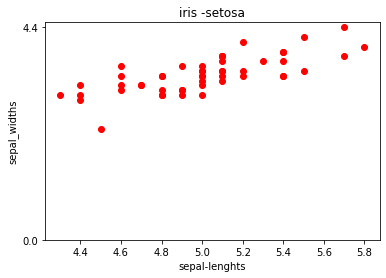

In [6]:
import matplotlib.pyplot as plt
plt.plot(sepal_lengths[:,0],sepal_widths,'ro',label='setosa')
plt.xlabel('sepal-lenghts')
plt.ylabel('sepal_widths')
plt.yticks([0,max(sepal_widths)])
plt.title('iris -setosa')
plt.show()

In [7]:
train_xs = sepal_lengths[:len(sepal_lengths)*2//3]
train_ys = sepal_widths[:len(sepal_widths)*2//3]
test_xs = sepal_lengths[len(sepal_lengths)*2//3:]
test_ys = sepal_widths[len(sepal_widths)*2//3:]
print(f"학습용 길이:{len(train_ys)} 테스트용 길이:{len(test_ys )}")

학습용 길이:33 테스트용 길이:17


거리계산

In [8]:
import numpy as np

In [12]:
def distance(x1,x2):
  if isinstance(x1,int) and isinstance(x2,int): # 두개의 값이 모두 int 형식일 때
   return np.abs(x2-x1) #차이의 절대값을 반환
  if isinstance(x1,list) and isinstance(x2,list):
    x1 = np.array(x1)
    x2 = np.array(x2)
  return sum((x1-x2)**2)**(1/2)

In [14]:
na1 = np.array([1,2])
na2 = np.array([4,6])
distance(na1,na2) #assert로 거리 계산 확인하기

5.0

k개의 가까운 이웃을 찾아라

In [27]:
def find_k_nearest_neighbor(xs,ys,tx,k=5):
  """
  입력 매개변수: xs,ys,tx,l
  xs: 독립변수(학습데이터)
  ys: 종속변수(학습데이터)
  ts: 독립변수(예측에 사용할 신입)
  k: 찾을 이웃 수
  반환: k개의 이웃의 y의 평균값
  """
  sarr =[]
  for i,x in enumerate(xs):
    dis = distance(x,tx)
    sarr.append((dis,i)) #계산한 거리와 인덱스를 보관

  sarr.sort(key = lambda x:x[0]) #dis 순으로 정렬

  k = min(k,len(sarr)) #현재 학습 데이터 개수와 k 중에 최솟값을 k로 확정
  neighbors = [x[1]for x in sarr[:k]] # 거리가 가까운 이웃 k개의 인덱스로 리스트 구성
  return sum(ys[neighbors])/k #이웃의 평균 값을 반환

In [28]:
def find_k_nearest_neighbors(xs,ys,t_xs,k=5):
  return [find_k_nearest_neighbor(xs,ys,tx,k) for tx in t_xs]

In [29]:
pred_val = find_k_nearest_neighbors(train_xs,train_ys,test_xs)
pred_val

[3.66,
 3.22,
 3.38,
 3.66,
 3.22,
 3.2,
 3.56,
 3.38,
 3.2399999999999998,
 3.2,
 3.38,
 3.56,
 3.22,
 3.56,
 3.3,
 3.72,
 3.38]

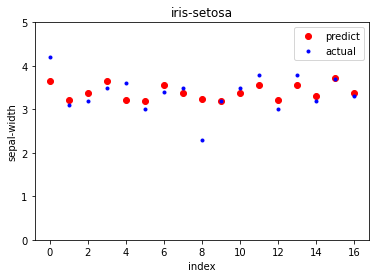

In [30]:
plt.plot(pred_val,'ro', label='predict')
plt.plot(test_ys,'b.',label='actual')
plt.ylim(0,5)
plt.legend()
plt.xlabel("index")
plt.ylabel("sepal-width")
plt.title("iris-setosa")
plt.show()

In [31]:
print(np.mean(np.abs(pred_val-test_ys)/test_ys))

0.07213767474452305


In [32]:
from sklearn.neighbors import KNeighborsRegressor

In [38]:
knr_model = KNeighborsRegressor() #모델 개체 생성
#n_neighbors=5 가 디폴트
knr_model.fit(train_xs,train_ys) #학습하세요.
pred_val2 = knr_model.predict(test_xs) #예측하세요.

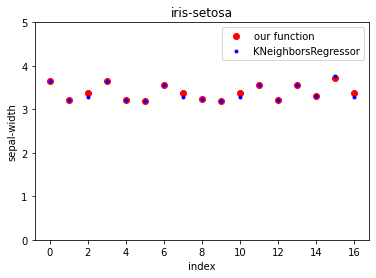

In [39]:
plt.plot(pred_val,'ro', label='our function')
plt.plot(pred_val2,'b.',label='KNeighborsRegressor')
plt.ylim(0,5)
plt.legend()
plt.xlabel("index")
plt.ylabel("sepal-width")
plt.title("iris-setosa")
plt.show()

In [40]:
print(np.mean(np.abs(pred_val2-test_ys)/test_ys))

0.07322719531933776


In [42]:
print(find_k_nearest_neighbors(train_xs,train_ys,[3.4]))
print(find_k_nearest_neighbors(train_xs,train_ys,[6]))
print(find_k_nearest_neighbors(train_xs,train_ys,[8]))
print(find_k_nearest_neighbors(train_xs,train_ys,[80])) #표본을 벗어나는 값..

[3.2]
[3.9599999999999995]
[3.9599999999999995]
[3.9599999999999995]


KNN에서 독립변수에 특성이 여러 개이고 특성에 따라 크기의 차이가 상당할 때

In [55]:
train_xs2 = np.array([[180,0.84],[190,0.89],[120,0.89],[150,0.49],[160,0.58],[170,0.65]])#[키, 몸무게]
train_ys2 = np.array([32,33,24,26,30,31]) #[허리둘레]
print(find_k_nearest_neighbor(train_xs2,train_ys2,[201,1.10],k=1))
print(find_k_nearest_neighbor(train_xs2,train_ys2,[186,0.84],k=1))

33.0
33.0


In [57]:
distance([180,0.84],[186,0.84]),distance([190,0.89],[186,0.84])

(6.0, 4.000312487793923)

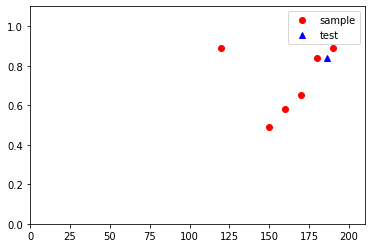

In [53]:
plt.figure()
plt.plot(train_xs2[:,0],train_xs2[:,1],'ro', label='sample')
plt.plot([186],[0.84],'b^',label = "test")
plt.legend()
plt.xlim(0,210)
plt.ylim(0,1.10)
plt.show()

In [63]:
#키
heights = train_xs2[:,0]
hm = heights.mean()
hs = heights.std()
heights2 = heights-hm #수평 이동
heights3 = heights2/hs #표준편차만큼 비율 조절

hm3 = heights3.mean()
hs3 = heights3.std()
hm3,hs3

(3.978299171573478e-16, 1.0)

In [75]:
#몸무게
#스케일 조절
weights = train_xs2[:,1]
wm = weights.mean()
ws = weights.std()

weights2 = weights-wm #수평 이동
weights3 = weights2/ws #표준편차만큼 비율 조절

wm3 = weights3.mean()
ws3 = weights3.std()
wm3,ws3

(-1.0547118733938987e-15, 1.0)

In [76]:
rescaled_train_xs = np.array([[heights3[i],w] for i,w in enumerate(weights3)])
rescaled_train_xs
#스케일의 단점 : 실질적인 데이터가 무엇인지 찾기 어렵다. 

array([[ 0.80873608,  0.73901526],
       [ 1.24986486,  1.05573609],
       [-1.83803656,  1.05573609],
       [-0.51465024, -1.47803052],
       [-0.07352146, -0.90793304],
       [ 0.36760731, -0.46452388]])

In [77]:
h = 186
w = 0.84
w3 = (w-wm)/ws
h3 = (h-hm)/hs
h3,w3
# 스케일을 조절한 값으로 거리 계산해야한다. 

(1.0734133482569597, 0.7390152621801355)

In [78]:
print(find_k_nearest_neighbor(rescaled_train_xs,train_ys2,[h3,w3], k=1))

32.0


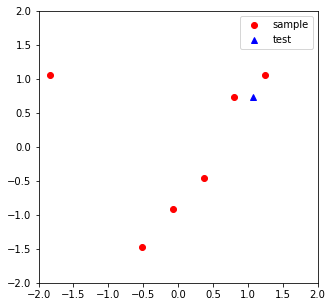

In [79]:
plt.figure(figsize=(5,5))
plt.plot(rescaled_train_xs[:,0],rescaled_train_xs[:,1],'ro',label='sample')
plt.plot([h3], [w3], 'b^', label="test")
plt.legend()
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.show()

선형 회귀 VS KNN 회귀

회귀 모델 VS 분류 모델(KNN